<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 3 - Introduction to Data Science </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>

# Problem Description
In this assignment, we work with PySpark, which is the Python API for Apache Spark. It enables performing real-time, large-scale data processing in a distributed environment using Python.

In [66]:
from IPython.display import display, HTML
display(HTML('<style>pre { white-space: pre !important; }</style>'))

In [67]:
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql.types import StructType, StructField, FloatType, DateType, LongType
from pyspark.sql.functions import to_date,year,month,min,mean,stddev,when,col,current_date,count, desc ,asc ,split ,length
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.window import Window

# Warm-Up!

In [68]:
def show_dataframe_info(df: DataFrame,num_of_rows=10):
    print("Schema:")
    df.printSchema()
    print(f"Number of Rows: {df.count()}")
    print("First Few Rows:")
    df.show(num_of_rows, vertical=True)  

## Question 1,2: Read & findout schema of data. 

In [69]:
spark = SparkSession.builder \
    .appName("AppName") \
    .config("spark.executor.memory", "8g") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

schema = StructType([
    StructField("Date", DateType(), True),
    StructField("Open", FloatType(), True),
    StructField("High", FloatType(), True),
    StructField("Low", FloatType(), True),
    StructField("Close", FloatType(), True),
    StructField("Volume", LongType(), True),
    StructField("Adj Close", FloatType(), True)
])

df = spark.read.option("header", True).schema(schema).csv("stocks.csv")

show_dataframe_info(df,10)

Schema:
root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Adj Close: float (nullable = true)

Number of Rows: 1762
First Few Rows:
-RECORD 0---------------
 Date      | 2010-01-04 
 Open      | 213.43     
 High      | 214.5      
 Low       | 212.38     
 Close     | 214.01     
 Volume    | 123432400  
 Adj Close | 27.72704   
-RECORD 1---------------
 Date      | 2010-01-05 
 Open      | 214.59999  
 High      | 215.59     
 Low       | 213.25     
 Close     | 214.37999  
 Volume    | 150476200  
 Adj Close | 27.774977  
-RECORD 2---------------
 Date      | 2010-01-06 
 Open      | 214.37999  
 High      | 215.23     
 Low       | 210.75     
 Close     | 210.97     
 Volume    | 138040000  
 Adj Close | 27.333178  
-RECORD 3---------------
 Date      | 2010-01-07 
 Open      | 211.75     
 High      | 212.0      

## Question 3 : Select opening, closing and volume for record with closing less than 500

In [70]:
q3_df = df.where(df["Close"]<500).select("Open","Close","Volume")
show_dataframe_info(q3_df,30)

Schema:
root
 |-- Open: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)

Number of Rows: 1359
First Few Rows:
-RECORD 0-----------
 Open   | 213.43    
 Close  | 214.01    
 Volume | 123432400 
-RECORD 1-----------
 Open   | 214.59999 
 Close  | 214.37999 
 Volume | 150476200 
-RECORD 2-----------
 Open   | 214.37999 
 Close  | 210.97    
 Volume | 138040000 
-RECORD 3-----------
 Open   | 211.75    
 Close  | 210.58    
 Volume | 119282800 
-RECORD 4-----------
 Open   | 210.29999 
 Close  | 211.98001 
 Volume | 111902700 
-RECORD 5-----------
 Open   | 212.8     
 Close  | 210.11    
 Volume | 115557400 
-RECORD 6-----------
 Open   | 209.19    
 Close  | 207.72    
 Volume | 148614900 
-RECORD 7-----------
 Open   | 207.87001 
 Close  | 210.65001 
 Volume | 151473000 
-RECORD 8-----------
 Open   | 210.11    
 Close  | 209.43    
 Volume | 108223500 
-RECORD 9-----------
 Open   | 210.93    
 Close  | 205.93    
 Volume | 148516900 
-R

## Question 4 : records with opening price more than 200 and closing price less than 200.

In [71]:
q4_df = df.filter((df["Open"] > 200) & (df["Close"] < 200))
show_dataframe_info(q4_df)

Schema:
root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Adj Close: float (nullable = true)

Number of Rows: 3
First Few Rows:
-RECORD 0---------------
 Date      | 2010-01-22 
 Open      | 206.78     
 High      | 207.5      
 Low       | 197.16     
 Close     | 197.75     
 Volume    | 220441900  
 Adj Close | 25.620401  
-RECORD 1---------------
 Date      | 2010-01-28 
 Open      | 204.93001  
 High      | 205.5      
 Low       | 198.7      
 Close     | 199.29     
 Volume    | 293375600  
 Adj Close | 25.819921  
-RECORD 2---------------
 Date      | 2010-01-29 
 Open      | 201.08     
 High      | 202.2      
 Low       | 190.25     
 Close     | 192.06     
 Volume    | 311488100  
 Adj Close | 24.883207  



## Question 5 : Extract the year from the date and save it in a new column.

In [72]:
q5_df = df.withColumn('year', year(df['Date']))
show_dataframe_info(q5_df)

Schema:
root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Adj Close: float (nullable = true)
 |-- year: integer (nullable = true)

Number of Rows: 1762
First Few Rows:
-RECORD 0---------------
 Date      | 2010-01-04 
 Open      | 213.43     
 High      | 214.5      
 Low       | 212.38     
 Close     | 214.01     
 Volume    | 123432400  
 Adj Close | 27.72704   
 year      | 2010       
-RECORD 1---------------
 Date      | 2010-01-05 
 Open      | 214.59999  
 High      | 215.59     
 Low       | 213.25     
 Close     | 214.37999  
 Volume    | 150476200  
 Adj Close | 27.774977  
 year      | 2010       
-RECORD 2---------------
 Date      | 2010-01-06 
 Open      | 214.37999  
 High      | 215.23     
 Low       | 210.75     
 Close     | 210.97     
 Volume    | 138040000  
 Adj Close | 27.333178  
 year      |

## Question 6 : show the minimum volumes traded for each year.

In [73]:
q6_df=q5_df.groupby("year").agg(min("Volume").alias("minVolume"))
q6_df.show()

+----+---------+
|year|minVolume|
+----+---------+
|2015| 13046400|
|2013| 41888700|
|2014| 14479600|
|2012| 43938300|
|2016| 11475900|
|2010| 39373600|
|2011| 44915500|
+----+---------+



## Question 7 : Show the highest low price for each year and month

In [74]:
q7_df=q5_df.groupby(["year",month(df["Date"])]).agg(min("Volume").alias("minVolume"))
show_dataframe_info(q7_df,84)

Schema:
root
 |-- year: integer (nullable = true)
 |-- month(Date): integer (nullable = true)
 |-- minVolume: long (nullable = true)

Number of Rows: 84
First Few Rows:
-RECORD 0----------------
 year        | 2012      
 month(Date) | 10        
 minVolume   | 92681400  
-RECORD 1----------------
 year        | 2010      
 month(Date) | 7         
 minVolume   | 105137900 
-RECORD 2----------------
 year        | 2010      
 month(Date) | 12        
 minVolume   | 39373600  
-RECORD 3----------------
 year        | 2015      
 month(Date) | 2         
 minVolume   | 37362400  
-RECORD 4----------------
 year        | 2014      
 month(Date) | 4         
 minVolume   | 40586000  
-RECORD 5----------------
 year        | 2015      
 month(Date) | 12        
 minVolume   | 13570400  
-RECORD 6----------------
 year        | 2016      
 month(Date) | 7         
 minVolume   | 23779900  
-RECORD 7----------------
 year        | 2016      
 month(Date) | 11        
 minVolume   | 11475900  

## Question 8 : Mean and standard deviation of high price over the whole data frame.

In [75]:
q8_df = df.agg(stddev("High").alias("Stddev High Price"),mean("High").alias("Mean High Price"))
show_dataframe_info(q8_df)

Schema:
root
 |-- Stddev High Price: double (nullable = true)
 |-- Mean High Price: double (nullable = true)

Number of Rows: 1
First Few Rows:
-RECORD 0------------------------------
 Stddev High Price | 186.8981766989906 
 Mean High Price   | 315.9112879420788 



# Main Task

Each field in your Spotify Parquet dataset represents:

- **id**: The unique identifier for the track.
- **name**: The name of the track.
- **album**: The name of the album that the track is from.
- **album_id**: The unique identifier for the album.
- **artists**: The list of artists who performed the track.
- **artist_ids**: The unique identifiers for the artists.
- **track_number**: The track number on the album.
- **disc_number**: The number of the disc where the track is from (useful for albums that span multiple discs).
- **explicit**: Whether or not the track has explicit lyrics (true or false).
- **danceability**: A measure of how suitable the track is for dancing based on a combination of musical elements. The value is between 0 and 1, with 1 being the most danceable.
- **energy**: A measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. The value is between 0 and 1.
- **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation.
- **loudness**: The overall loudness of the track in decibels (dB).
- **mode**: The modality of the track (major is represented by 1 and minor is 0).
- **speechiness**: The presence of spoken words in the track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value.
- **acousticness**: A confidence measure of whether the track is acoustic. The value is between 0 and 1.
- **instrumentalness**: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- **liveness**: Detects the presence of an audience in the recording. A value above 0.8 provides strong likelihood that the track is live.
- **valence**: A measure of musical positiveness. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).
- **tempo**: The overall estimated tempo of the track in beats per minute (BPM).
- **duration_ms**: The duration of the track in milliseconds.
- **time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- **year**: The year the track was released.
- **release_date**: The date the track was released.

In [76]:
spotify_df = spark.read.parquet("spotify.parquet")
show_dataframe_info(spotify_df,5)
spotify_df.describe().show()

Schema:
root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: string (nullable = true)

Number of Rows: 1204025
First

In [77]:
def print_missing_percentages(df):
    total_rows = df.count()
    
    missing_values = {}

    for col in df.columns:
        missing_count = df.filter(df[col].isNull()).count()
        
        missing_percentage = (missing_count / total_rows) * 100
        
        missing_values[col] = {"count": missing_count, "percentage": missing_percentage}

    for col, values in missing_values.items():
        print(f"{col}: {values['count']} missing values ({values['percentage']}%)")

In [78]:
print_missing_percentages(spotify_df)

id: 0 missing values (0.0%)
name: 3 missing values (0.00024916426153941986%)
album: 11 missing values (0.0009136022923112062%)
album_id: 0 missing values (0.0%)
artists: 0 missing values (0.0%)
artist_ids: 0 missing values (0.0%)
track_number: 0 missing values (0.0%)
disc_number: 0 missing values (0.0%)
explicit: 0 missing values (0.0%)
danceability: 0 missing values (0.0%)
energy: 0 missing values (0.0%)
key: 0 missing values (0.0%)
loudness: 0 missing values (0.0%)
mode: 0 missing values (0.0%)
speechiness: 0 missing values (0.0%)
acousticness: 0 missing values (0.0%)
instrumentalness: 0 missing values (0.0%)
liveness: 0 missing values (0.0%)
valence: 0 missing values (0.0%)
tempo: 0 missing values (0.0%)
duration_ms: 0 missing values (0.0%)
time_signature: 0 missing values (0.0%)
year: 0 missing values (0.0%)
release_date: 0 missing values (0.0%)


In [79]:
spotify_df = spotify_df.na.drop()
print_missing_percentages(spotify_df)

id: 0 missing values (0.0%)
name: 0 missing values (0.0%)
album: 0 missing values (0.0%)
album_id: 0 missing values (0.0%)
artists: 0 missing values (0.0%)
artist_ids: 0 missing values (0.0%)
track_number: 0 missing values (0.0%)
disc_number: 0 missing values (0.0%)
explicit: 0 missing values (0.0%)
danceability: 0 missing values (0.0%)
energy: 0 missing values (0.0%)
key: 0 missing values (0.0%)
loudness: 0 missing values (0.0%)
mode: 0 missing values (0.0%)
speechiness: 0 missing values (0.0%)
acousticness: 0 missing values (0.0%)
instrumentalness: 0 missing values (0.0%)
liveness: 0 missing values (0.0%)
valence: 0 missing values (0.0%)
tempo: 0 missing values (0.0%)
duration_ms: 0 missing values (0.0%)
time_signature: 0 missing values (0.0%)
year: 0 missing values (0.0%)
release_date: 0 missing values (0.0%)


In [80]:
def convert_to_date(df, column_name):
    df = df.withColumn(column_name, to_date(col(column_name), "yyyy-MM-dd"))
    
    return df

spotify_df = convert_to_date(spotify_df, "release_date")

In [82]:
unique_artists = spotify_df.select("artists").distinct()

unique_artists.show(truncate=False)

+-------------------------------------------------------------------------------------------------+
|artists                                                                                          |
+-------------------------------------------------------------------------------------------------+
|['Blue Öyster Cult']                                                                             |
|['Evie Ladin Band']                                                                              |
|['Jadox, Dickumz Da Ox']                                                                         |
|['Sanctum']                                                                                      |
|['The Flaming Lips']                                                                             |
|['Shofu', 'OmarCameUp']                                                                          |
|['Martha Reeves & The Vandellas']                                                                |


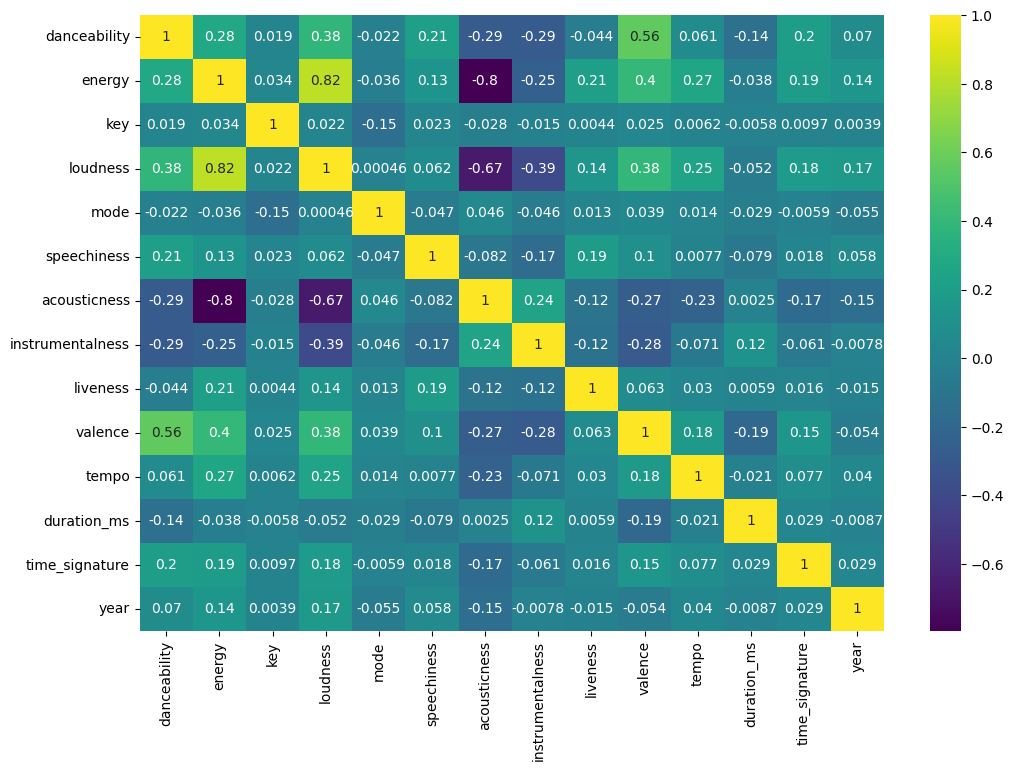

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd

# List of numerical columns
num_cols = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", "year"]

# Convert the numerical columns to a vector column
assembler = VectorAssembler(inputCols=num_cols, outputCol="features")
df_vector = assembler.transform(spotify_df).select("features")

# Calculate the correlation matrix
matrix = Correlation.corr(df_vector, "features")

# Get the correlation matrix as a local DataFrame
corr_matrix = matrix.collect()[0]["pearson(features)"].values

# Convert the correlation matrix to a 2D array
corr_matrix = np.reshape(corr_matrix, (len(num_cols), len(num_cols)))

# Convert the correlation matrix to a pandas DataFrame
corr_df = pd.DataFrame(corr_matrix, columns=num_cols, index=num_cols)

# Create a figure
plt.figure(figsize=(12,8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_df, annot=True, cmap='viridis')

# Show the plot
plt.show()


In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# List of numerical columns
num_cols = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", "year"]

# Convert the numerical columns to a vector column
assembler = VectorAssembler(inputCols=num_cols, outputCol="features")
spotify_df = assembler.transform(spotify_df)

# Train a k-means model
kmeans = KMeans(featuresCol='features', predictionCol='prediction', k=3)
model = kmeans.fit(spotify_df)

# Make predictions (assign each point to a cluster)
predictions = model.transform(spotify_df)

# Calculate the distance from each point to its centroid
distances = model.computeCost(predictions)

# Define a threshold for outliers
threshold = distances.mean() + 3 * distances.stddev()

# Filter the outliers
outliers = predictions.filter(col('distance') > threshold)

# Filter the non-outliers
km_spotify_df = predictions.filter(col('distance') <= threshold)


In [96]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StandardScaler
from pyspark.ml.linalg import DenseVector
from pyspark.ml.ensemble import IsolationForest

# Identify numerical columns
numerical_cols = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

# Assemble numerical columns into a vector column
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="features")
df_numerical = assembler.transform(df)

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
df_scaled = scaler.fit(df_numerical).transform(df_numerical)

# Train the Isolation Forest model
iso_forest = IsolationForest(featuresCol="scaled_features", predictionCol="outlier_label", contamination=0.1)
model = iso_forest.fit(df_scaled)

# Detect outliers
outliers = model.transform(df_scaled)

ModuleNotFoundError: No module named 'pyspark.ml.ensemble'

In [97]:
import pyspark

# Print the PySpark version
print(pyspark.__version__)

3.5.1


In [92]:
show_dataframe_info(spotify_df,5)

Schema:
root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: date (nullable = true)

Number of Rows: 1204012
First F

In [63]:
from pyspark.sql import functions as F
from pyspark.sql.types import ArrayType, StringType
import ast

# Define a UDF to convert string to list
def string_to_list(s):
    return ast.literal_eval(s)

string_to_list_udf = F.udf(string_to_list, ArrayType(StringType()))

# Apply the UDF to the DataFrame
spotify_df = spotify_df.withColumn("artists", string_to_list_udf(F.col("artists")))

In [65]:
spotify_df.show(10 , truncate=False)

Py4JJavaError: An error occurred while calling o884.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 827.0 failed 1 times, most recent failure: Lost task 0.0 in stage 827.0 (TID 3294) (DESKTOP-0862V20 executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:54)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1583)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:701)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:745)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:698)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:663)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:639)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:585)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:543)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 27 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at jdk.internal.reflect.GeneratedMethodAccessor121.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1583)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:54)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:701)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:745)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:698)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:663)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:639)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:585)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:543)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 27 more


In [12]:
spotify_df = spotify_df.dropDuplicates(['id'])
spotify_df=spotify_df.na.drop()

In [13]:
current_year = year(current_date())
spotify_df = spotify_df.withColumn('song_age', current_year - col('year'))

In [14]:
artist_song_counts = spotify_df.groupby('artists').agg(count('*').alias('song_count'))

artist_song_counts = artist_song_counts.orderBy(desc('song_count'))

top_20_artists = artist_song_counts.limit(20)

top_20_artists.show()


+--------------------+----------+
|             artists|song_count|
+--------------------+----------+
| ['Various Artists']|      1753|
|['Vitamin String ...|      1577|
| ['Aretha Franklin']|      1209|
|['The City of Pra...|      1042|
|["Dan Gibson's So...|       997|
|       ['Bob Dylan']|       913|
|        ['The Fall']|       812|
|["Pickin' On Seri...|       774|
|    ['Dolly Parton']|       747|
|['Guided By Voices']|       739|
|  ['Dionne Warwick']|       728|
|   ['Fleetwood Mac']|       696|
|   ['Elvis Presley']|       645|
|['Revolt Producti...|       627|
|['Mannheim Steamr...|       619|
|     ['Udo Jürgens']|       615|
|  ['Emmylou Harris']|       607|
|   ['Barry Manilow']|       605|
|      ['Al Jarreau']|       597|
| ['Grant Macdonald']|       587|
+--------------------+----------+



In [15]:
spotify_df_filtered = spotify_df.filter(spotify_df['year'] != 0)
spotify_df_filtered.count()

1204002

In [16]:
oldest_song = spotify_df_filtered.orderBy(asc('year')).first()

print("Oldest Song:")
print("Name:", oldest_song['name'])
print("Artist:", oldest_song['artists'])
print("Year:", oldest_song['year'])

Oldest Song:
Name: Dreams Of A Dying City
Artist: ['Rabih Abou-Khalil']
Year: 1900


In [17]:
songs_by_year = spotify_df_filtered.groupby('year').agg(count('*').alias('song_count')).orderBy('year')

songs_by_year_list = songs_by_year.collect()

years = [row['year'] for row in songs_by_year_list]
song_counts = [row['song_count'] for row in songs_by_year_list]


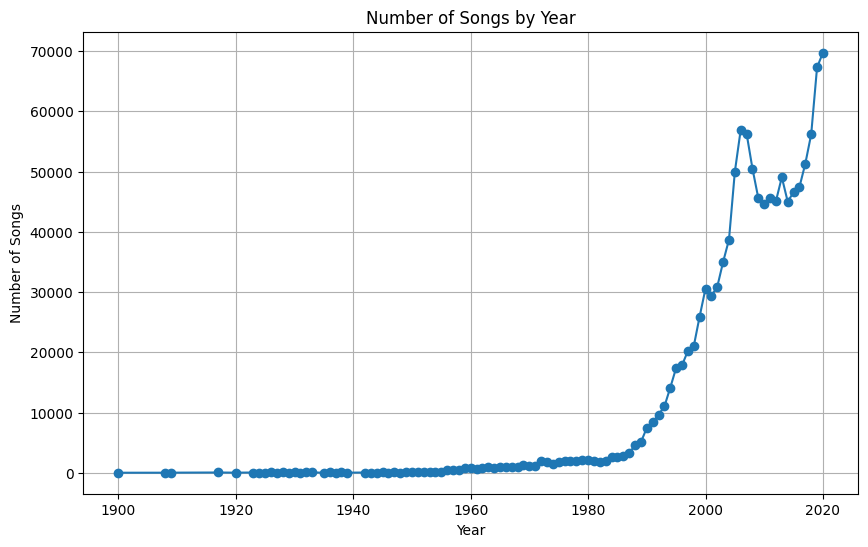

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(years, song_counts, marker='o', linestyle='-')
plt.title('Number of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

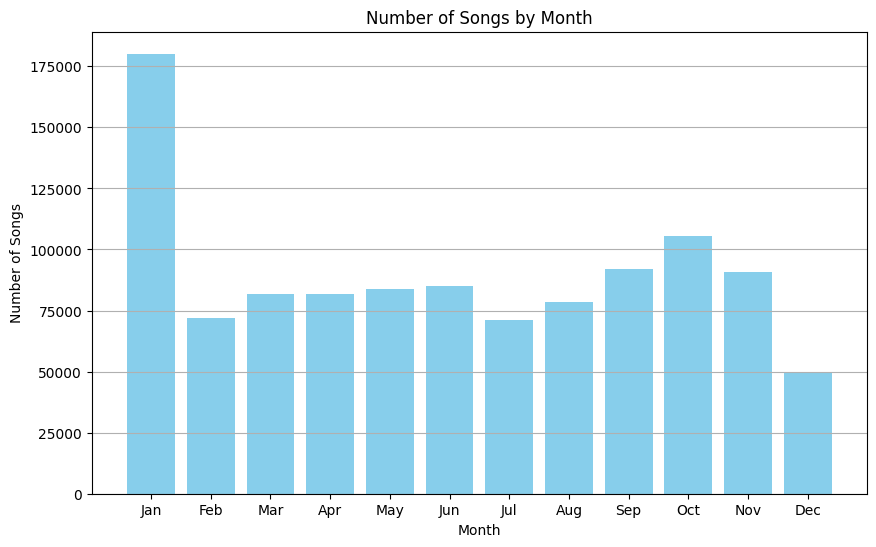

In [19]:
modified_spotify_df = spotify_df.withColumn('release_date', to_date(spotify_df['release_date'], 'yyyy-MM-dd'))

modified_spotify_df = modified_spotify_df.withColumn('release_month', month('release_date'))
modified_spotify_df = modified_spotify_df.filter(modified_spotify_df['release_month'].isNotNull())

songs_by_month = modified_spotify_df.groupby('release_month').agg(count('*').alias('song_count')).orderBy('release_month')
songs_by_month_list = songs_by_month.collect()

months = [row['release_month'] for row in songs_by_month_list]
song_counts = [row['song_count'] for row in songs_by_month_list]

plt.figure(figsize=(10, 6))
plt.bar(months, song_counts, color='skyblue')
plt.title('Number of Songs by Month')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


In [20]:
fields = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for i in range(len(fields)):
    for j in range(i+1, len(fields)):
        field1 = fields[i]
        field2 = fields[j]

        corr_coef = spotify_df.stat.corr(field1, field2)

        print(f"Correlation coefficient between {field1} and {field2}: {corr_coef}")



Correlation coefficient between danceability and energy: 0.28301014278556086
Correlation coefficient between danceability and loudness: 0.3781901856734295
Correlation coefficient between danceability and speechiness: 0.2098539145769179
Correlation coefficient between danceability and acousticness: -0.2857437090792233
Correlation coefficient between danceability and instrumentalness: -0.2853342702443259
Correlation coefficient between danceability and liveness: -0.044328942165953594
Correlation coefficient between danceability and valence: 0.5634357954305642
Correlation coefficient between danceability and tempo: 0.06058535302662649
Correlation coefficient between energy and loudness: 0.817932887901163
Correlation coefficient between energy and speechiness: 0.13080862733635334
Correlation coefficient between energy and acousticness: -0.7962415923681635
Correlation coefficient between energy and instrumentalness: -0.25213860013266376
Correlation coefficient between energy and liveness: 0

From the correlation coefficients provided, we can understand several things about the relationships between the musical characteristics:

1. **Positive Correlation between Danceability and Loudness:** Danceability and loudness have a positive correlation coefficient of 0.378. This suggests that songs with higher danceability tend to have higher loudness.
2. **Negative Correlation between Danceability and Acousticness/Instrumentalness:** Danceability has negative correlations with acousticness (-0.286) and instrumentalness (-0.285). This indicates that songs with higher danceability tend to have lower acousticness and instrumentalness.
3. **Positive Correlation between Energy and Loudness/Valence:** Energy is positively correlated with loudness `(0.818)` and valence (0.400). This implies that songs with higher energy levels tend to be louder and have higher valence (positivity or happiness).
4. **Negative Correlation between Energy and Acousticness:** Energy has a strong negative correlation with acousticness `(-0.796)`. This suggests that energetic songs are less likely to be acoustic.
5. **Positive Correlation between Loudness and Valence:** Loudness and valence have a positive correlation coefficient of 0.385. This means that songs with higher loudness tend to have higher valence.
6. **Negative Correlation between Loudness and Acousticness/Instrumentalness:** Loudness is negatively correlated with both acousticness `(-0.672)` and instrumentalness (-0.393). This indicates that louder songs are less likely to be acoustic or instrumental.
7. **Positive Correlation between Acousticness and Valence:** Acousticness and valence have a negative correlation coefficient of -0.269. This suggests that acoustic songs are more likely to have lower valence.

## Questions
### 1. Read about how Spark and Hadoop work. What does the term ‘lazy evaluation’ mean for them? Explain with a simple example

### 2. Your main task’s dataset has about 1,200,000 rows, which makes it quite hard, and even sometimes impossible, to work with. Explain how parquet files try to solve this problem, compared to normal file formats like csv.
Parquet files are a columnar storage format commonly used in **big data processing** frameworks like Apache Spark. They are designed to address the challenges posed by large datasets, such as the one you mentioned with approximately 1,200,000 rows. Parquet files offer several advantages over normal file formats like CSV when it comes to handling large volumes of data:

1. **Columnar Storage:** Parquet files store data in a columnar format, meaning that values from each column are stored together. This storage layout is highly efficient for analytics workloads, as it allows for selective column reading. When processing queries that only access specific columns, Parquet can efficiently skip over irrelevant data, leading to significant performance gains compared to row-based storage formats like CSV.

2. **Compression:** Parquet files support various compression algorithms, such as Snappy, Gzip, and LZO. Compression reduces the file size, which not only saves storage space but also improves I/O performance by reducing disk reads and writes. With smaller file sizes, Parquet files can be transferred more quickly over the network, resulting in faster data processing.

3. **Predicate Pushdown:** Parquet files support predicate pushdown, a feature that enables query engines like Apache Spark to push filtering conditions down to the storage layer. This means that only the relevant data blocks are read from disk, reducing the amount of data transferred over the network and improving query performance. In contrast, CSV files do not inherently support predicate pushdown, so the entire file must be read into memory before filtering can be applied.

4. **Schema Evolution:** Parquet files store metadata about the schema along with the data. This allows for schema evolution, meaning that changes to the schema, such as adding new columns or modifying data types, can be easily accommodated without requiring the entire dataset to be rewritten. In contrast, modifying the schema of CSV files typically requires processing the entire dataset, which can be time-consuming and resource-intensive.

5. **Data Partitioning:** Parquet files can be partitioned based on one or more columns, enabling efficient data retrieval for specific subsets of data. Partitioning allows for faster query execution by minimizing the amount of data that needs to be scanned. CSV files do not inherently support data partitioning, so querying specific subsets of data may require scanning the entire file.